***
## <center> Lecture--08 "Machine Learning and Deep Learning"
***

#  Demo-01: Working with Imbalanced Datasets

Run this command, if you haven't installed the package imbalanced-learn yet:

`!pip install imbalanced-learn`

If you don't know which version of the package you have installed or whether you have installed it at all, please run:

`pip show imbalanced-learn`


This exercise is adapted from the following webpage: https://imbalanced-learn.org/stable/auto_examples/over-sampling/plot_comparison_over_sampling.html

## [TO-DO] Please read and familiarize yourself with the package imbalanced-learn
https://pypi.org/project/imbalanced-learn/

In [1]:
#Load the necessary packages for this exercise
import imblearn
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC
import numpy as np
from collections import Counter

We provide you with two helper functions, which make it easier for you to understand different over- and undersampling methods:

In [2]:
def CreateData(n_samples=1000, weights=(0.01, 0.01, 0.98), n_classes=3,
                   class_sep=0.8, n_clusters=1):
    
    return make_classification(n_samples=n_samples, n_features=2,
                               n_informative=2, n_redundant=0, n_repeated=0,
                               n_classes=n_classes,
                               n_clusters_per_class=n_clusters,
                               weights=list(weights),
                               class_sep=class_sep, random_state=0)

Creates by default a dataset with 1000 observations and three classes, whereas 98% (980 observation) belong to one class, 
and in the other two classes there are only 10 oberservations (1%) each. For each class, there will be one cluster. `class_sep`: Larger values spread out the clusters/classes and make the classification task easier.

Reading [this documentation on make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) further helps understanding the created method `CreateData`.

In [3]:
def PlotBoundary(clf, X, labels, ax = None, h = 0.02, tolX1 = 0.5, tolX2 = 0.5, **params):
    """
    Plots a decision boundary for a classifier.
    Params:
    param clf : trained classifier model
    param X : the features of the dataset. (n x number_of_features)
    param labels : the labels for the features (n x 1)
    """
    # creates a mesh of points to plot in
    x_min, x_max = X[:, 0].min() - tolX1, X[:, 0].max() + tolX1
    y_min, y_max = X[:, 1].min() - tolX2, X[:, 1].max() + tolX2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    #if axis doesn't exist, define it
    if not ax:
        ax = plt
        plt.figure(figsize = (10, 8))
    
    # plot the decision boundaries for the classifier
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap = plt.cm.Set1, alpha = 0.3)

    # plot the data
    ax.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Set1, s = 30, alpha = 0.6, edgecolors = 'k')

## Demo - 1: Usage of linear SVM classifier

[To-Do] Please explore how class imbalance affects learning when using a linear SVM classifier. Therfore, please understand the following code and interpret the visualizations. Which conclusions can you draw?

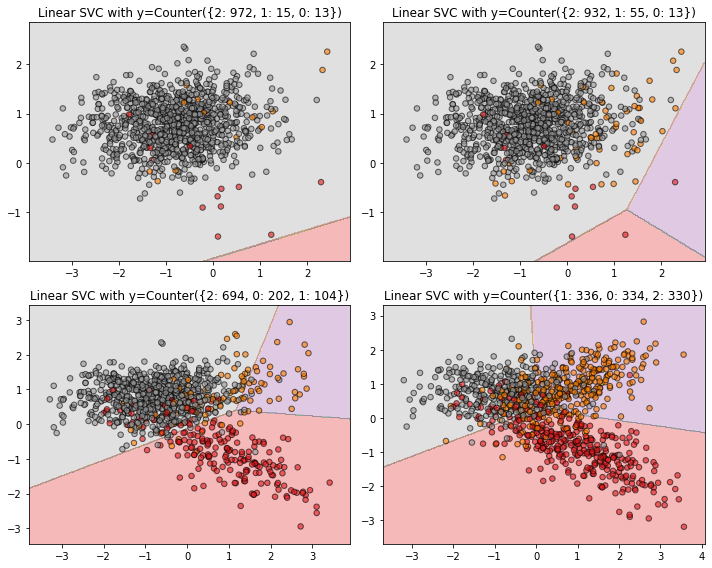

In [4]:
#Creates a figure with 4 visualizations in a 2x2 grid
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))

ax_arr = (ax1, ax2, ax3, ax4)
# We explore different types of class imbalances (from really imbalanced datasets to equally distributed classes)
weights_arr = ((0.01, 0.01, 0.98), (0.01, 0.05, 0.94),
               (0.2, 0.1, 0.7), (0.3333, 0.3333, 0.3333))
for ax, weights in zip(ax_arr, weights_arr):
    # create a dataset for each type of weights_arr with its specified weights
    X, y = CreateData(n_samples=1000, weights=weights)
    # train a LinearSVC model
    clf = LinearSVC().fit(X, y)
    # plot the model's decision boundary
    PlotBoundary(clf, X, y, ax)
    ax.set_title('Linear SVC with y={}'.format(Counter(y)))
    
fig.tight_layout()

[To-DO] Which conclusions can you draw?

It turns out that higher imbalances lead to poorer classfication results. For really imbalanced classes (first row of the visualiation) it becomes evident that the Linear SVM is not capable of seperating the obervations from the minority classes into meaningful "regions".

## Demo - 02: Random oversampling

Now let's decrease the imbalance. First oversample the minority classes by picking examples at random with replacement. This is called random oversampling.

[TO-DO] Please read more about this approach [here](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html):

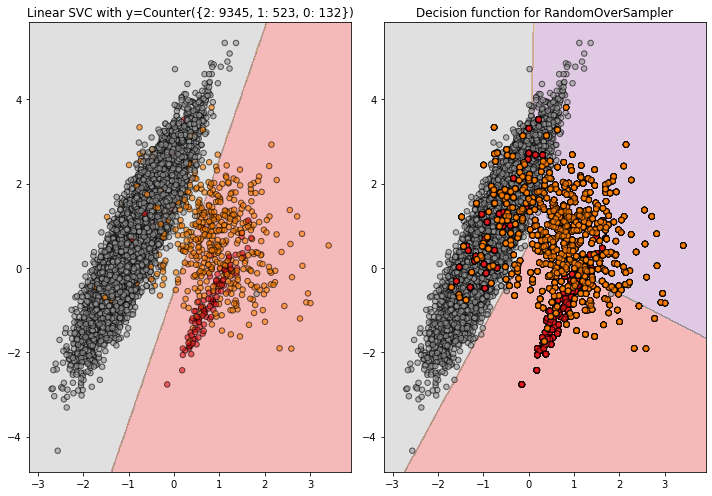

In [5]:
#[TO-DO] Load the method RandomOverSampler from imblearn.over_sampling
from imblearn.over_sampling import RandomOverSampler
#We want to create two visualizations in one figure (one for the initial and one for the oversampled observation)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 7))
# [TO-DO] create imbalanced data of 1000 oberservations, where 1% belong to one class, 5% to the second and 94% to the third class
X, y = CreateData(n_samples=10000, weights=(0.01, 0.05, 0.94))
# [To-DO] train the model on the imbalanced data
clf = LinearSVC().fit(X, y)
# [To-DO] Plot the decision boundary on ax1
PlotBoundary(clf, X, y, ax1)
ax1.set_title('Linear SVC with y={}'.format(Counter(y)))

# [TO-DO] Implement the random oversample method. Don't fotget to set a random state for reproducibility. Use auto as the sampling_strategy.
ros = RandomOverSampler(random_state=0)
# [TO-DO] Add examples by randomly oversampling the minority classes
X, y = ros.fit_resample(X, y)
# [TO-DO] train the model on the data with less imbalance. We just randomly oversampled the minority class.
clf = LinearSVC().fit(X, y)
# [TO-DO] Plot the decision boundary on ax2
PlotBoundary(clf, X, y, ax2)
ax2.set_title('Decision function for RandomOverSampler')
fig.tight_layout()

## Demo - 3: Oversampling by using the SMOTE algorithm
Now we use the SMOTE algorithm to oversample the minority classes. Please, first oversample only the class that has the least number of examples.

[To-DO] Please read the documentation [here](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)

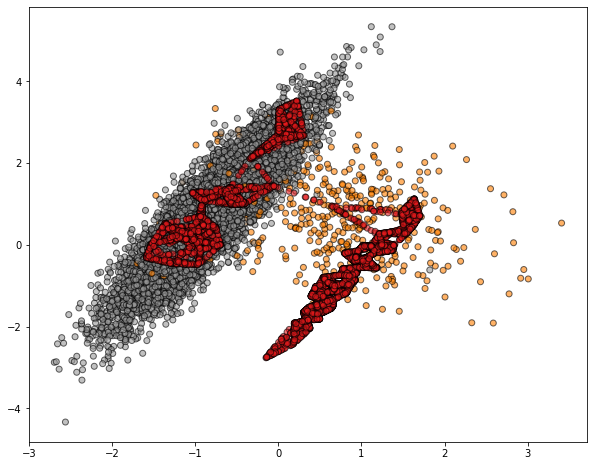

In [6]:
# [TO-DO] Load the method SMOTE from imblearn.over_sampling
from imblearn.over_sampling import SMOTE
# [TO-DO] create imbalanced data of 1000 oberservations, where 1% belong to one class, 4% to the second and 95% to the third class
X, y = CreateData(n_samples=10000, weights=(0.01, 0.04, 0.95))
# [TO-DO] Load the method to oversample only the minority class, by selecting sampling_strategy='minority'
smote = SMOTE(sampling_strategy = 'minority', random_state = 0)
# [TO-DO] Resample the imbalanced data
X, y = smote.fit_resample(X, y)
#This will create visualiaztions
plt.figure(figsize = (10, 8))
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Set1, alpha = 0.6, edgecolor = 'k')

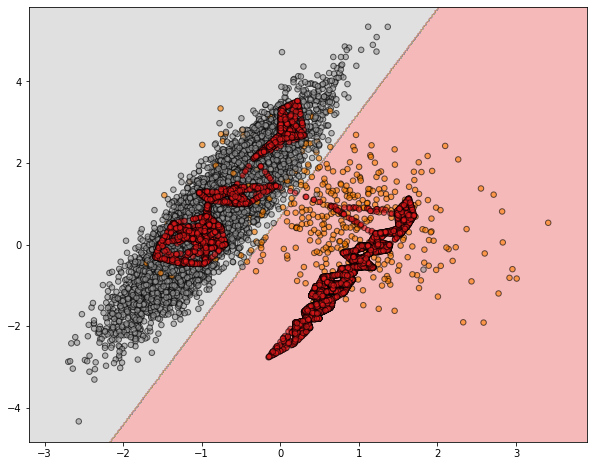

In [7]:
# [TO-DO] Train an SVM model for the resampled data and plot the decision boundary    
clf = LinearSVC().fit(X, y)
PlotBoundary(clf, X, y)

This time oversample both minority classes with SMOTE, not just one.Does it have any effect on the decision boundary?

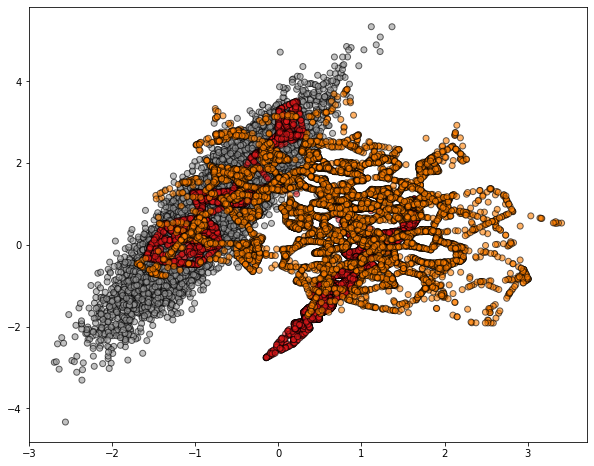

In [8]:
# [TO-DO] create imbalanced data of 1000 oberservations, where 1% belong to one class, 4% to the second and 95% to the third class
X, y = CreateData(n_samples=10000, weights=(0.01, 0.05, 0.94))
# [TO-DO] Load the method to oversample both minority classes 
smote = SMOTE(sampling_strategy = 'not majority', random_state = 0)
# [TO-DO] Resample the imbalanced data
X, y = smote.fit_resample(X, y)
#This will create visualiaztions
plt.figure(figsize = (10, 8))
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Set1, alpha = 0.6, edgecolor = 'k')

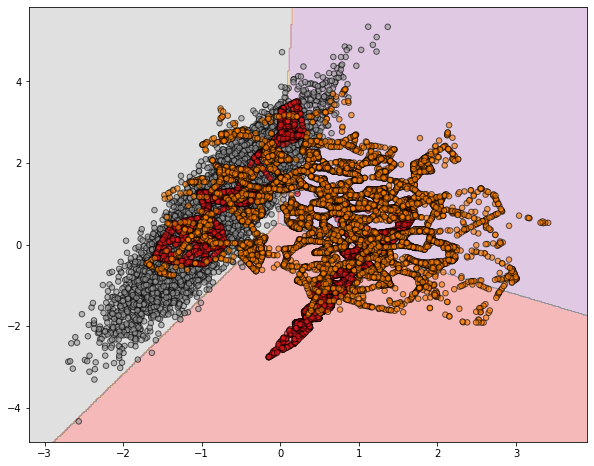

In [9]:
# [TO-DO] Train a classifier and plot the decision boundary
clf = LinearSVC().fit(X, y)
PlotBoundary(clf, X, y)

## Demo - 4: ADASYN
The Adaptive synthetic sampling approach for imbalanced learning ([ADASYN](https://ieeexplore.ieee.org/document/4633969)) focuses on examples that are more difficult to classify, while SMOTE treats all examples equally.

[To-DO] Please read the documentation of ADASYN [here](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.ADASYN.html)

[To-DO] Please implement ADASYN with the step by step help in the cell below. Compare the synthetic examples generated by ADASYN with those created by SMOTE. Why is there a differences?

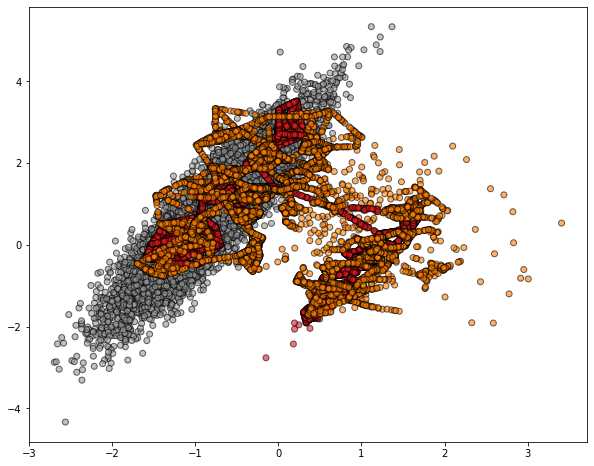

In [10]:
# [TO-DO] Load the method ADASYN from imblearn.over_sampling
from imblearn.over_sampling import ADASYN
# [TO-DO] create imbalanced data of 1000 oberservations, where 1% belong to one class, 4% to the second and 95% to the third class
X, y = CreateData(n_samples=10000, weights=(0.01, 0.04, 0.95)) 
# [TO-DO] Load the ADASYN method with the not majority sampling strategy
adasyn = ADASYN(sampling_strategy = 'not majority', random_state = 0)
# [TO-DO] Resample the imbalanced data
X, y = adasyn.fit_resample(X, y)
#Plot the resampled data
plt.figure(figsize = (10, 8))
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Set1, alpha = 0.6, edgecolor = 'k')

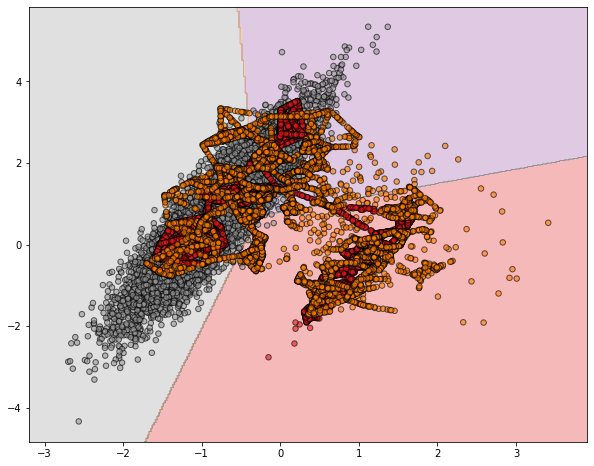

In [11]:
# [TO-DO] Train a linear SVM on the data created by ADASYN and plot the decision boundary. 
clf = LinearSVC().fit(X, y)
PlotBoundary(clf, X, y)